<a href="https://colab.research.google.com/github/ERojickova/Statistika/blob/main/Statistika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Statistika**

Statistický soubor: Teplota vzduchu měřená v Klementinu každý den od 1. ledna 1775

Data jsou dostupná online na https://www.chmi.cz/historicka-data/pocasi/praha-klementinum

Cílem tohoto notebooku je spočítat základní statististické veličiny pro tato data.

In [1]:
# Načtení potřebných knihoven

import pandas as pd
import numpy as np
import datetime
from math import sqrt
import matplotlib.pyplot as plt
import calendar
import datetime

In [2]:
# Načtení statistického souboru
# jelikož se na soubor nedá odkázat přímo na stránky ČHMÚ, tak jsem ho nahrála na vlastní server rojicek.cz
df = pd.read_excel(r'https://www.rojicek.cz/pocasi/PKLM_pro_portal.xlsx', sheet_name='data')

#vyhození nepotřebných sloupců
del df['Flag']
del df['SRA']
del df['TMI']
del df['TMA']

# vytvoř extra sloupec s časem
df['cas'] = df[['rok', 'měsíc', 'den']].apply(lambda s : datetime.datetime(*s).strftime('%d. %m. %Y'), axis = 1)


# Přidání sloupečku zaokrouhlené teploty na celá čísla
df['Zaokrouhlena_T-AVG'] = round(df['T-AVG'])

In [3]:
# Zobrazení prvních 10 řádků statistického souboru
df.head(10)

,rok,měsíc,den,T-AVG,cas,Zaokrouhlena_T-AVG
0,1775,1,1,-7.0,01. 01. 1775,-7.0
1,1775,1,2,-2.2,02. 01. 1775,-2.0
2,1775,1,3,-1.0,03. 01. 1775,-1.0
3,1775,1,4,0.1,04. 01. 1775,0.0
4,1775,1,5,2.2,05. 01. 1775,2.0
5,1775,1,6,3.2,06. 01. 1775,3.0
6,1775,1,7,3.5,07. 01. 1775,4.0
7,1775,1,8,4.1,08. 01. 1775,4.0
8,1775,1,9,4.0,09. 01. 1775,4.0
9,1775,1,10,2.0,10. 01. 1775,2.0


In [4]:
# Aritmetický průměr pomocí funkce mean()
avg = round(df['T-AVG'].mean(), 1)

# Aritmetický průměr pomocí funkce sum() a vydělení počtem prvků
avg2 = df['T-AVG'].sum() / len(df['T-AVG'])

# Modus
mod = df['T-AVG'].mode()
mod_zak = df['Zaokrouhlena_T-AVG'].mode()

# Medián
med = df['T-AVG'].median()
med_zak  =df['Zaokrouhlena_T-AVG'].median()

# Maximum a minimum
max = df['T-AVG'].max()
den_maxima = df['cas'][df['T-AVG'] == max].iloc[0]
min = df['T-AVG'].min()
den_minima = df['cas'][df['T-AVG'] == min].iloc[0]

# Rozptyl
rozptyl = round(df['T-AVG'].var(), 1)

# Směrodatná odchylka pomocí funkce
smer_odchylka = round(df['T-AVG'].std(), 1)

# Směrodatná odchylka jako odmocnina rozptylu 
smer_odchylka2 = sqrt(rozptyl)

# Variační koeficient
var_koef = round(smer_odchylka/avg * 100, 1)



# Zobrazení výsledků
print("Výsledky:")
print("-----")
print(f"Průměrná teplota od roku 1775: {avg} °C")
print(f"Modus teplot: {mod[0]} °C")
print(f"Medián teplot: {med} °C")
print(f"Maximální průměrná teplota: {max} °C, byla dosažena {den_maxima}")
print(f"Minimální průměrná teplota: {min} °C, byla dosažena {den_minima}")

print(f"Rozptyl teplot: {rozptyl} °C")
print(f"Směrodatná odchylka: {smer_odchylka} °C")
print(f"Variační koeficient: {var_koef} %")
print("-----")
print("Výsledky ze zaokrouhlených hodnot:")
print(f"Modus: {mod_zak[0]}")
print(f"Medián: {med_zak}")


Výsledky:
-----
Průměrná teplota od roku 1775: 9.7 °C
Modus teplot: 17.1 °C
Medián teplot: 9.9 °C
Maximální průměrná teplota: 31.9 °C, byla dosažena 27. 07. 1782
Minimální průměrná teplota: -24.8 °C, byla dosažena 22. 01. 1850
Rozptyl teplot: 69.5 °C
Směrodatná odchylka: 8.3 °C
Variační koeficient: 85.6 %
-----
Výsledky ze zaokrouhlených hodnot:
Modus: 18.0
Medián: 10.0


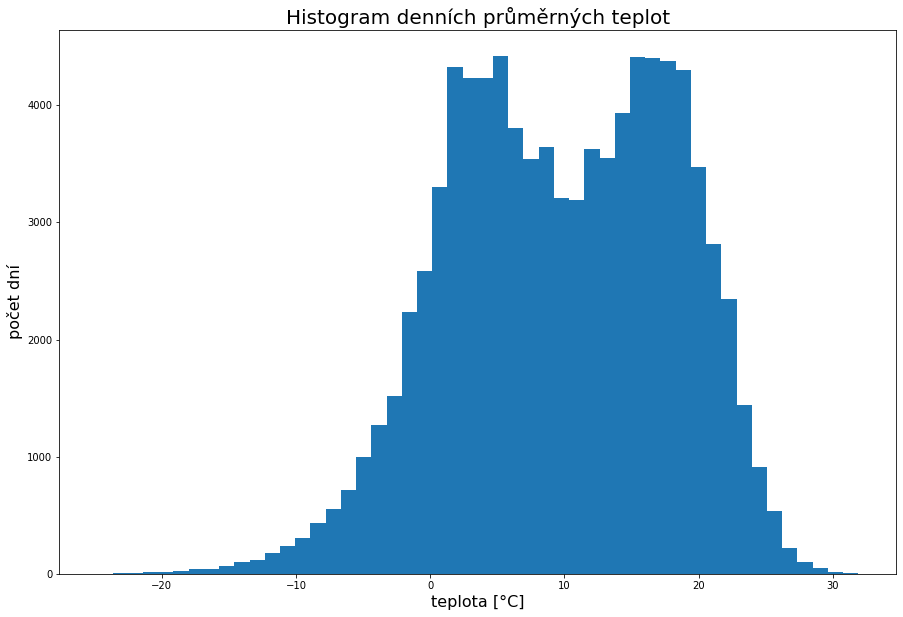

In [5]:
# histogram průměrné teploty
# 
plt.figure(figsize=(15,10))

(n, bins, patches) = plt.hist(df['T-AVG'], bins=50)
plt.title("Histogram denních průměrných teplot", fontsize=20)
plt.xlabel("teplota [°C]", fontsize=16)
plt.ylabel("počet dní", fontsize=16);




Z histogramu ukazuje dva prominentní vrcholy, takže rozložení denních průměrných teplot je dvoumodální. První vrchol odpovídá teplotě 4.7 °C a druhý 17.1 °C. 

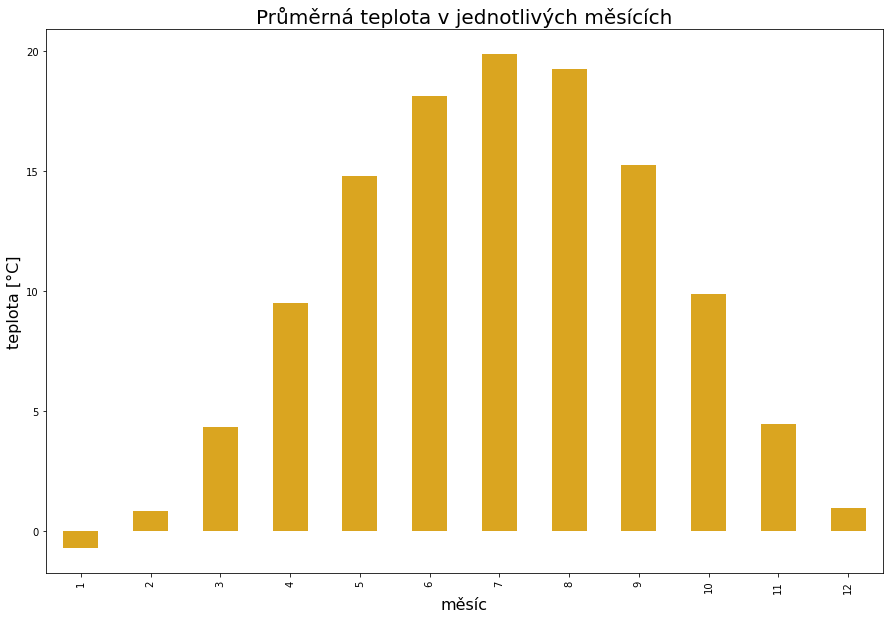

In [6]:
df_mesicni = df.groupby(['měsíc'])['T-AVG'].mean()

fig = plt.figure(figsize=(15,10))
df_mesicni.plot.bar(color='goldenrod')
plt.xlabel("měsíc", fontsize=16)
plt.ylabel("teplota [°C]", fontsize=16)
plt.title("Průměrná teplota v jednotlivých měsících", fontsize=20);


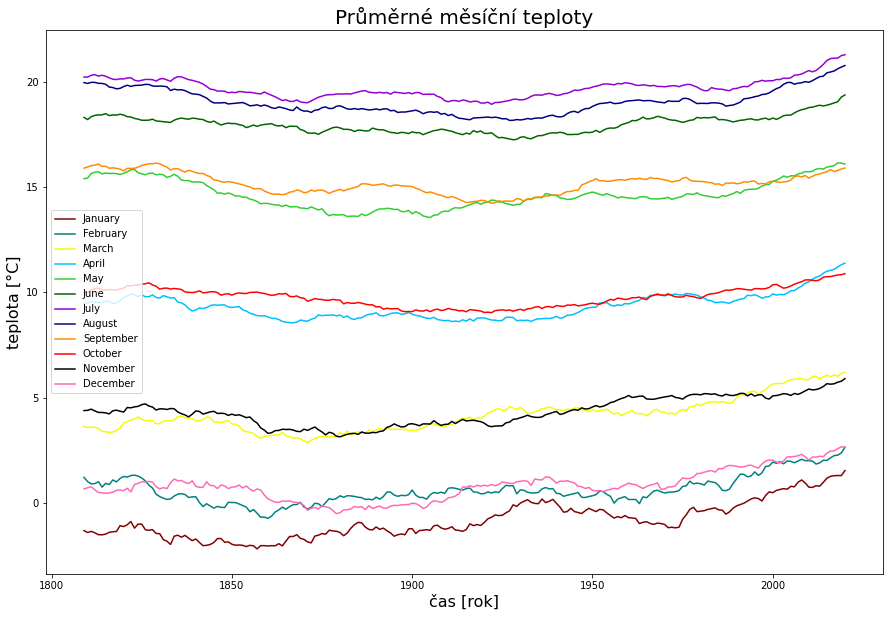

In [7]:


df_mesice_roky = df.groupby(['rok', 'měsíc']).mean()

vsechny_mesice = df_mesice_roky.index.get_level_values('měsíc').unique().sort_values()

moje_barvy = ['maroon', 'teal', '#f4fc03', 'deepskyblue', 'limegreen', 'darkgreen', 'darkviolet', 'navy', 'darkorange', 'red', 'black', 'hotpink']


plt.figure(figsize=(15,10))
for m in vsechny_mesice:
  jeden_mesic  = df_mesice_roky.iloc[df_mesice_roky.index.get_level_values('měsíc') == m]['T-AVG'].droplevel('měsíc').rolling(35).mean()
  plt.plot(jeden_mesic, label = calendar.month_name[m], color = moje_barvy[m-1])

plt.legend()
plt.title("Průměrné měsíční teploty", fontsize=20)
plt.xlabel("čas [rok]", fontsize=16)
plt.ylabel('teplota [°C]', fontsize=16);

Na grafu lze sledovat ve kterých měsících se teploty podobají. V jarních a podzimních měsících se tvoří dvojce měsíců, kde jsou podobné teploty. A to přesněji březen s listopadem, duben s říjnem a květen s zářím. Ale jelikož počasí nezávisí jenom na teplotě, tak nemůžeme říct, že v březnu a listopadu je stejné počasí. 

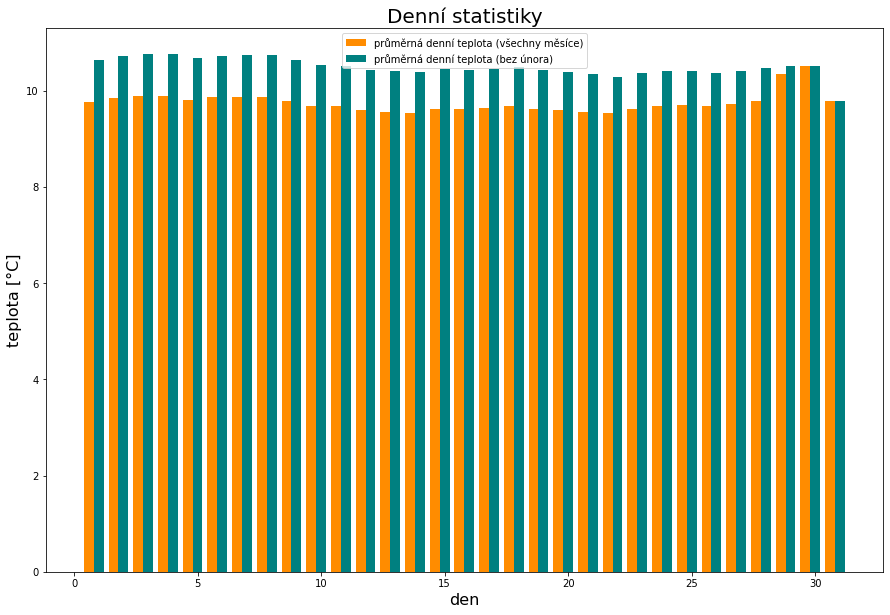

In [8]:
df_denni = df.groupby(['den']).mean()
df_denni_bez_unora = df[(df['měsíc'] != 2)].groupby(['den']).mean()

plt.figure(figsize=(15,10))
w = 0.4
plt.bar (df_denni.index-w, df_denni['T-AVG'], label='průměrná denní teplota (všechny měsíce)', width=w, color="darkorange")
plt.bar (df_denni_bez_unora.index, df_denni_bez_unora['T-AVG'], label='průměrná denní teplota (bez února)', width=w, color="teal")
plt.title('Denní statistiky', fontsize=20)
plt.ylabel('teplota [°C]', fontsize=16)
plt.xlabel('den', fontsize=16)
plt.legend();

V grafu Denní statistiky jsou zakresleny průměrné teploty pro jednotlivé dny bez ohledu na měsíce.

Jelikož jsou dny v roce rozloženy pravidelně, dává smysl, že průměrné teploty jsou přibližně stejné. Jediné dny 29. a 30. jsou výrazně vyšší. Pro vysvětlení jsou zobrazené průměrné teploty, kde není započítaný únor. 

Dny 30. a 31. jsou úplně stejné, protože 30.2. a 31.2. nikdy nenastane. Den 29. je s únorem o trošku menší. Únor průměrnou teplotu snižuje, ale jelikož 29.2. je jen každý čtvrý rok, nesnižuje teplotu 29. stejně jako ostatní dny. 
